#### This notebook shows how to import and manipulate MFC data and explains some of the features of the data set. 

Import libraries 

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# needed for plots to appear in Jupyter notebook, not needed in regular .py python file (use plt.show() instead)
%matplotlib inline              

## Importing data from an excel file

Import data to Pandas data frame : the data frame is a sort of code equivalent to an excel spreadsheet

(this may take a while to run, as the imported file is large)

In [150]:
data = pd.read_excel('data/MFCs_Yeshaswini_MScRobotics/MFC_data_membranes.xlsx', usecols='E:S')
data.head()
data.head()

Time  101 (VDC)  102 (VDC)  103 (VDC)  104 (VDC)  \
0  20/09/2013 11:07:56:323   0.159922   0.179851   0.000326   0.000268   
1  20/09/2013 11:09:56:334   0.159935   0.180052   0.000326   0.000268   
2  20/09/2013 11:11:56:337   0.159713   0.179971   0.000325   0.000268   
3  20/09/2013 11:13:56:298   0.159573   0.179904   0.000324   0.000269   
4  20/09/2013 11:15:56:320   0.159415   0.179767   0.000325   0.000269   

   107 eco-float  108 (VDC)  113 (VDC)  114 (VDC)  115 (VDC)  116 (VDC)  \
0       0.345597   0.014866   0.148139   0.000087   0.110980   0.165459   
1       0.345578   0.014992   0.148119   0.000087   0.110970   0.165359   
2       0.091837   0.014910   0.148119   0.000087   0.110974   0.165407   
3       0.095520   0.014979   0.148111   0.000088   0.110990   0.165423   
4       0.098465   0.014954   0.148037   0.000089   0.110932   0.165282   

   117 (VDC)  118 (VDC)  119 (VDC)  120 (VDC)  
0   0.008632   0.000009   0.000001   0.115977  
1   0.008644   0.000009   0.000002   0.115978  
2   0.008627   0.000009   0.000002   0.116004  
3   0.008648   0.000009   0.000002   0.116133  
4   0.008651   0.000009   0.000002   0.116155

Convert the date_time column to date_time information

In [151]:
data['Time'] = pd.to_datetime(data['Time'], format='%d/%m/%Y %H:%M:%S:%f')
#data['Time'][0].year

Use the `replace` function to remove seconds and milliseconds data as sampling interval is 2 mins

In [152]:
data['Time'] = data['Time'].apply(lambda x: x.replace(microsecond=0, second=0))
#data['Time'][1].replace(second=0)

Make the date_time column the index 

In [153]:
data.set_index('Time', drop=True, inplace=True)
data.head()

101 (VDC)  102 (VDC)  103 (VDC)  104 (VDC)  \
Time                                                              
2013-09-20 11:07:00   0.159922   0.179851   0.000326   0.000268   
2013-09-20 11:09:00   0.159935   0.180052   0.000326   0.000268   
2013-09-20 11:11:00   0.159713   0.179971   0.000325   0.000268   
2013-09-20 11:13:00   0.159573   0.179904   0.000324   0.000269   
2013-09-20 11:15:00   0.159415   0.179767   0.000325   0.000269   

                     107 eco-float  108 (VDC)  113 (VDC)  114 (VDC)  \
Time                                                                  
2013-09-20 11:07:00       0.345597   0.014866   0.148139   0.000087   
2013-09-20 11:09:00       0.345578   0.014992   0.148119   0.000087   
2013-09-20 11:11:00       0.091837   0.014910   0.148119   0.000087   
2013-09-20 11:13:00       0.095520   0.014979   0.148111   0.000088   
2013-09-20 11:15:00       0.098465   0.014954   0.148037   0.000089   

                     115 (VDC)  116 (VDC)  117 (VDC)  118 (VDC)  119 (VDC)  \
Time                                                                         
2013-09-20 11:07:00   0.110980   0.165459   0.008632   0.000009   0.000001   
2013-09-20 11:09:00   0.110970   0.165359   0.008644   0.000009   0.000002   
2013-09-20 11:11:00   0.110974   0.165407   0.008627   0.000009   0.000002   
2013-09-20 11:13:00   0.110990   0.165423   0.008648   0.000009   0.000002   
2013-09-20 11:15:00   0.110932   0.165282   0.008651   0.000009   0.000002   

                     120 (VDC)  
Time                            
2013-09-20 11:07:00   0.115977  
2013-09-20 11:09:00   0.115978  
2013-09-20 11:11:00   0.116004  
2013-09-20 11:13:00   0.116133  
2013-09-20 11:15:00   0.116155

The columns can be renamed to show the membrane type

In [154]:
data.columns = ['CEM_a', 'CEM_b',
                'Tangoplus_500um_a','Tangoplus_500um_b',
                'Eco_float', 'N/A',
                'Tangoplus_116um_a','Tangoplus_116um_b',
                'Latex_100um_a', 'Latex_100um_b',
                'Silicone_50um_a', 'Silicone_50um_b',
                'Latex_500um_a', 'Latex_500um_b' 
               ]

data.head()

CEM_a     CEM_b  Tangoplus_500um_a  Tangoplus_500um_b  \
Time                                                                            
2013-09-20 11:07:00  0.159922  0.179851           0.000326           0.000268   
2013-09-20 11:09:00  0.159935  0.180052           0.000326           0.000268   
2013-09-20 11:11:00  0.159713  0.179971           0.000325           0.000268   
2013-09-20 11:13:00  0.159573  0.179904           0.000324           0.000269   
2013-09-20 11:15:00  0.159415  0.179767           0.000325           0.000269   

                     Eco_float       N/A  Tangoplus_116um_a  \
Time                                                          
2013-09-20 11:07:00   0.345597  0.014866           0.148139   
2013-09-20 11:09:00   0.345578  0.014992           0.148119   
2013-09-20 11:11:00   0.091837  0.014910           0.148119   
2013-09-20 11:13:00   0.095520  0.014979           0.148111   
2013-09-20 11:15:00   0.098465  0.014954           0.148037   

                     Tangoplus_116um_b  Latex_100um_a  Latex_100um_b  \
Time                                                                   
2013-09-20 11:07:00           0.000087       0.110980       0.165459   
2013-09-20 11:09:00           0.000087       0.110970       0.165359   
2013-09-20 11:11:00           0.000087       0.110974       0.165407   
2013-09-20 11:13:00           0.000088       0.110990       0.165423   
2013-09-20 11:15:00           0.000089       0.110932       0.165282   

                     Silicone_50um_a  Silicone_50um_b  Latex_500um_a  \
Time                                                                   
2013-09-20 11:07:00         0.008632         0.000009       0.000001   
2013-09-20 11:09:00         0.008644         0.000009       0.000002   
2013-09-20 11:11:00         0.008627         0.000009       0.000002   
2013-09-20 11:13:00         0.008648         0.000009       0.000002   
2013-09-20 11:15:00         0.008651         0.000009       0.000002   

                     Latex_500um_b  
Time                                
2013-09-20 11:07:00       0.115977  
2013-09-20 11:09:00       0.115978  
2013-09-20 11:11:00       0.116004  
2013-09-20 11:13:00       0.116133  
2013-09-20 11:15:00       0.116155

Numerical data can alternatively be handled as a numpy array.

In [155]:
# Convert data frame to numpy array
data_array = data.to_numpy()

# Add a column to represent the time series (in mins)
t_series = np.array(range(data_array.shape[0])) * 2
data_array = np.c_[t_series, data_array]

## Plotting the data

Plotting a numpy array is very simple

Text(0.5, 1.0, ' MFC1 ')

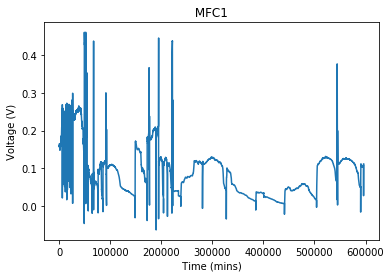

In [142]:
plt.plot(data_array[:,0], data_array[:,1])
plt.xlabel(' Time (mins) ')
plt.ylabel(' Voltage (V) ')
plt.title(' MFC1 ')

### What this plot shows

In the plot, we can see the voltage from the MFC. 

The MFC is given food, a spike or peak is observed in the voltage. 

As the food is used up, the voltage falls until the next feeding time. 

While a schedule of feeding times was recorded, it is much easier to determine the MFC feeding times by identifying the points at which there was a very sharp rise in voltage. 

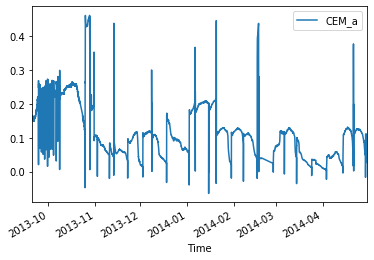

In [23]:
# One MFC
data.plot(y=['CEM_a' ])

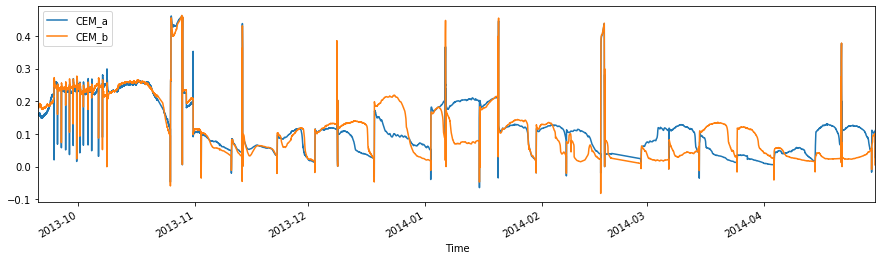

In [24]:
# Two MFCs on the same plot
data.plot(y=['CEM_a' ,'CEM_b' ], figsize=(15,4))

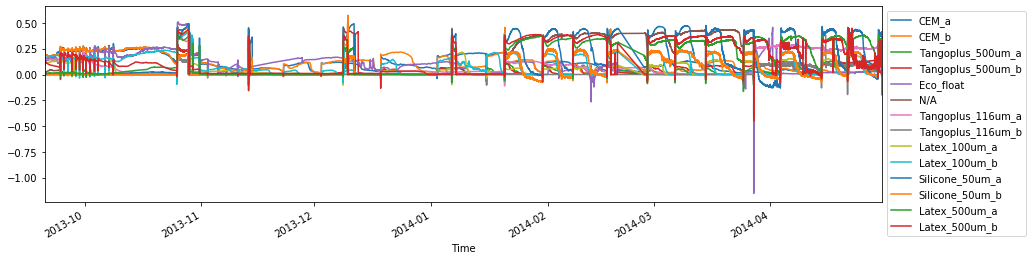

In [25]:
# All MFCs
ax = data.plot(figsize=(15,4));
ax.legend(loc='best', bbox_to_anchor=(1,1))

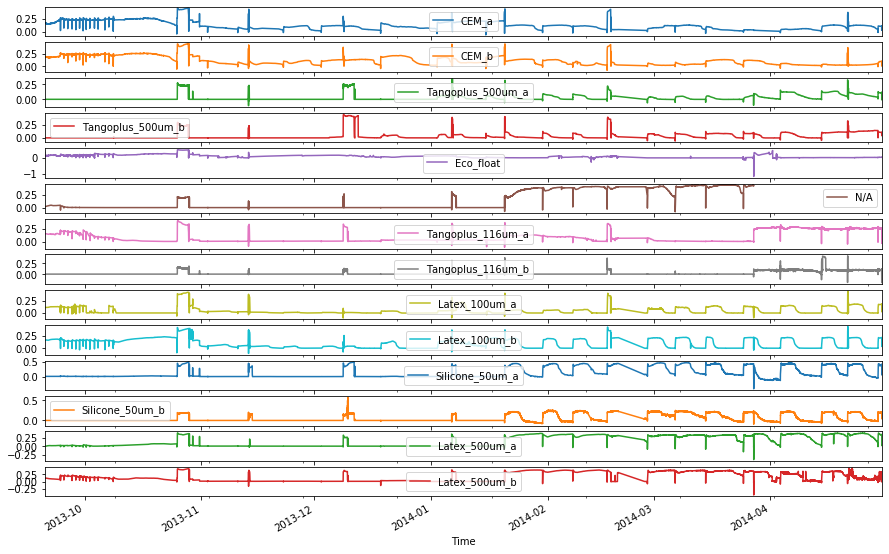

In [26]:
# All MFCs on seperate sub-plots
data.plot(subplots=True, figsize=(15,10));

## What affects the MFC voltage? 
The MFC voltage is affected by the electrical load/resistance applied to each MFC. 

The schedule of applied resistances is given (somewhat untidily) in the same file as the MFC data:

<img src="img/MFCs_membranes.png" alt="Drawing" style="width: 700px;"/>

We can use this to divide the data into periods during which differnt loads were applied and we can store this information in the data frame.

We can also use this information to remove data from periods when __polarisation experiments__ were being carried out (__polarisation experiment:__ Resistances in the range 0 to inf. are applied to the MFC to observe the maximum power point).

In [80]:
schedule = pd.read_excel('data/MFCs_Yeshaswini_MScRobotics/MFC_data_membranes.xlsx', 
                         usecols='V:X', names=['R', 'Start', 'End'], 
                         skiprows=1, nrows=31)
display(schedule)

R  \
0                                             10 kohm   
1                                                 O/C   
2                               Polarisation 28/10/13   
3                                              5 kohm   
4                                              1 kohm   
5                                                 O/C   
6                               Polarisation 13/11/13   
7                                              1 kohm   
8                                              1 kohm   
9                                                 O/C   
10                              Polarisation 08/12/13   
11                                             1 kohm   
12                                             4 kohm   
13                                                O/C   
14                              Polarisation 06/01/14   
15                                              4kohm   
16  Rint (1[101,102], 3[115, 116],13[103, 104] ,35...   
17  Rint (1[101,102], 3[115, 116],13[103, 104] ,35...   
18  Rint (1[101,102], 3[115, 116],13[103, 104] ,35...   
19                                                O/C   
20                              Polarisation 17/02/14   
21  Rint (1[101,102], 3[115, 116],13[103, 104] ,35...   
22  Rint (1[101,102], 3[115, 116],13[103, 104] ,35...   
23  Rint (1[101,102], 3[115, 116],13[103, 104] ,35...   
24                              Rint (1,3,13,35 kohm)   
25  Rint (1[101,102], 3[115, 116],13[103, 104] ,35...   
26                    Rint (1,3,13,35 kohm) CONTINUED   
27  Rint (1[101,102], 3[115, 116],13[103, 104] ,35...   
28  Rint (1[101,102], 3[115, 116],13[103, 104] ,35...   
29                              Polarisation 21/04/14   
30  Rint (1[101,102], 3[115, 116],13[103, 104] ,35...   

                      Start                      End  
0   20/09/2013  11:09:00:00  25/10/2013 14:34:19:355  
1   25/10/2013 14:37:19:355  28/10/2013 11:10:19:319  
2   28/10/2013 18:43:19:333  29/10/2013 16:37:19:334  
3   29/10/2013 17:16:19:319  31/10/2013 11:07:19:323  
4   31/10/2013 12:31:19:325  13/11/2013 11:55:19:344  
5   13/11/2013 12:04:19:436  13/11/2013 12:46:19:350  
6   13/11/2013 12:46:19:350  14/11/2013 12:46:19:349  
7   14/11/2013 13:22:19:335  22/11/2013 18:34:19:364  
8   22/11/2013 18:37:19:357  08/12/2013 14:10:19:356  
9   08/12/2013 14:10:19:356  08/12/2013 15:26:22:388  
10  08/12/2013 15:26:52:383  12/12/2013 14:30:22:366  
11  12/12/2013 14:30:52:361  18/12/2013 13:56:52:375  
12  19/12/2013 10:20:22:369  06/01/2014 09:46:15:354  
13  06/01/2014 09:52:15:349  06/01/2014 10:58:15:371  
14  06/01/2014 11:01:15:383  07/01/2014 15:17:07:375  
15  07/01/2014 15:17:37:365  20/01/2014 10:29:39:329  
16  20/01/2014 13:41:39:344  30/01/2014 12:47:39:347  
17  30/01/2014 13:08:39:322  07/02/2014 12:59:39:354  
18  07/02/2014 13:23:39:344  16/02/2014 15:52:54:402  
19  16/02/2014 16:43:54:424  17/02/2014 14:22:54:425  
20  17/02/2014 14:23:52:357  17/02/2014 16:47:52:350  
21  17/02/2014 16:48:22:345  26/02/2014 12:30:47:699  
22  27/02/2014 08:16:43:300  06/03/2014 16:57:43:331  
23  06/03/2014 17:08:13:337  14/03/2014 19:21:43:329  
24  14/03/2014 19:29:43:319  24/03/2014 19:45:43:331  
25  24/03/2014 20:06:13:327  27/03/2014 12:42:43:300  
26  27/03/2014 13:29:13:310  27/03/2014 16:10:43:303  
27  03/04/2014 15:12:13:300  09/04/2014 18:00:43:335  
28  14/04/2014 13:18:13:335  21/04/2014 11:12:13:325  
29  21/04/2014 11:12:43:319  21/04/2014 16:26:13:303  
30  21/04/2014 17:28:43:300  29/04/2014 12:51:43:347

Convert date and time colunms to date and time

In [81]:
schedule['Start'] = pd.to_datetime(schedule['Start'],  format='%d/%m/%Y %H:%M:%S:%f')
schedule['Start'] = schedule['Start'].apply(lambda x: x.replace(second=0, microsecond=0))

schedule['End'] = pd.to_datetime(schedule['End'],  format='%d/%m/%Y %H:%M:%S:%f')
schedule['End'] = schedule['End'].apply(lambda x: x.replace(second=0, microsecond=0))

schedule.head()

R               Start                 End
0                10 kohm 2013-09-20 11:09:00 2013-10-25 14:34:00
1                    O/C 2013-10-25 14:37:00 2013-10-28 11:10:00
2  Polarisation 28/10/13 2013-10-28 18:43:00 2013-10-29 16:37:00
3                 5 kohm 2013-10-29 17:16:00 2013-10-31 11:07:00
4                 1 kohm 2013-10-31 12:31:00 2013-11-13 11:55:00

Create a new column to store the resistance values.

In [156]:
data.insert(2, "R_CEM", None) 
data.insert(5, "R_Tango_500um", None) 
data.insert(10, "R_Tango_116um", None) 
data.insert(13, "R_Latex_100um", None) 
data.insert(16, "R_Silicone_50um", None) 
data.insert(19, "R_Latex_500um", None) 
data.head()

CEM_a     CEM_b R_CEM  Tangoplus_500um_a  \
Time                                                               
2013-09-20 11:07:00  0.159922  0.179851  None           0.000326   
2013-09-20 11:09:00  0.159935  0.180052  None           0.000326   
2013-09-20 11:11:00  0.159713  0.179971  None           0.000325   
2013-09-20 11:13:00  0.159573  0.179904  None           0.000324   
2013-09-20 11:15:00  0.159415  0.179767  None           0.000325   

                     Tangoplus_500um_b R_Tango_500um  Eco_float       N/A  \
Time                                                                        
2013-09-20 11:07:00           0.000268          None   0.345597  0.014866   
2013-09-20 11:09:00           0.000268          None   0.345578  0.014992   
2013-09-20 11:11:00           0.000268          None   0.091837  0.014910   
2013-09-20 11:13:00           0.000269          None   0.095520  0.014979   
2013-09-20 11:15:00           0.000269          None   0.098465  0.014954   

                     Tangoplus_116um_a  Tangoplus_116um_b R_Tango_116um  \
Time                                                                      
2013-09-20 11:07:00           0.148139           0.000087          None   
2013-09-20 11:09:00           0.148119           0.000087          None   
2013-09-20 11:11:00           0.148119           0.000087          None   
2013-09-20 11:13:00           0.148111           0.000088          None   
2013-09-20 11:15:00           0.148037           0.000089          None   

                     Latex_100um_a  Latex_100um_b R_Latex_100um  \
Time                                                              
2013-09-20 11:07:00       0.110980       0.165459          None   
2013-09-20 11:09:00       0.110970       0.165359          None   
2013-09-20 11:11:00       0.110974       0.165407          None   
2013-09-20 11:13:00       0.110990       0.165423          None   
2013-09-20 11:15:00       0.110932       0.165282          None   

                     Silicone_50um_a  Silicone_50um_b R_Silicone_50um  \
Time                                                                    
2013-09-20 11:07:00         0.008632         0.000009            None   
2013-09-20 11:09:00         0.008644         0.000009            None   
2013-09-20 11:11:00         0.008627         0.000009            None   
2013-09-20 11:13:00         0.008648         0.000009            None   
2013-09-20 11:15:00         0.008651         0.000009            None   

                     Latex_500um_a  Latex_500um_b R_Latex_500um  
Time                                                             
2013-09-20 11:07:00       0.000001       0.115977          None  
2013-09-20 11:09:00       0.000002       0.115978          None  
2013-09-20 11:11:00       0.000002       0.116004          None  
2013-09-20 11:13:00       0.000002       0.116133          None  
2013-09-20 11:15:00       0.000002       0.116155          None

In [157]:
print(schedule['Start'][0], schedule['End'][0])

print(data.loc[schedule['Start'][0], 'CEM_a'])


# Using DataFrame.insert() to add a column 
# R_all = data.iloc[:, [2, 5, 10, 13, 16, 19]]
R_all = ["R_CEM", "R_Tango_500um", "R_Tango_116um", "R_Latex_100um", "R_Silicone_50um", "R_Latex_500um"]


# R = 10kohm
indices = [0,]
for i in indices:
    data.loc[schedule['Start'][i]:schedule['End'][i], R_all] = 10
    
    
# R = 5kohm
indices = [3,]
for i in indices:
    data.loc[schedule['Start'][i]:schedule['End'][i], R_all] = 5
    

# R = 1kohm
indices = [4,7,8,11]
for i in indices:
    data.loc[schedule['Start'][i]:schedule['End'][i], R_all] = 1
    
    
# R = 4kohm
indices = [12,15]
for i in indices:
    data.loc[schedule['Start'][i]:schedule['End'][i], R_all] = 4


2013-09-20 11:09:00 2013-10-25 14:34:00
0.15993503


In [158]:
indices = [16, 17, 18] + list(range(21, 28)) + [30,]
print(indices)


# CEM R = 1kohm
for i in indices:
    data.loc[schedule['Start'][i]:schedule['End'][i], "R_CEM"] = 1
    
    
# Latex R = 3kohm
for i in indices:
    data.loc[schedule['Start'][i]:schedule['End'][i], "R_Latex_100um"] = 3
    
    
# Tango_116um R = 35kohm
for i in indices:
    data.loc[schedule['Start'][i]:schedule['End'][i], "R_Tango_116um"] = 35
    
    
# Tango_500um R = 13kohm
for i in indices:
    data.loc[schedule['Start'][i]:schedule['End'][i], "R_Tango_500um"] = 13

[16, 17, 18, 21, 22, 23, 24, 25, 26, 27, 30]


Remove polarisation experiment data from the data set

In [159]:
data.head()

CEM_a     CEM_b R_CEM  Tangoplus_500um_a  \
Time                                                               
2013-09-20 11:07:00  0.159922  0.179851  None           0.000326   
2013-09-20 11:09:00  0.159935  0.180052    10           0.000326   
2013-09-20 11:11:00  0.159713  0.179971    10           0.000325   
2013-09-20 11:13:00  0.159573  0.179904    10           0.000324   
2013-09-20 11:15:00  0.159415  0.179767    10           0.000325   

                     Tangoplus_500um_b R_Tango_500um  Eco_float       N/A  \
Time                                                                        
2013-09-20 11:07:00           0.000268          None   0.345597  0.014866   
2013-09-20 11:09:00           0.000268            10   0.345578  0.014992   
2013-09-20 11:11:00           0.000268            10   0.091837  0.014910   
2013-09-20 11:13:00           0.000269            10   0.095520  0.014979   
2013-09-20 11:15:00           0.000269            10   0.098465  0.014954   

                     Tangoplus_116um_a  Tangoplus_116um_b R_Tango_116um  \
Time                                                                      
2013-09-20 11:07:00           0.148139           0.000087          None   
2013-09-20 11:09:00           0.148119           0.000087            10   
2013-09-20 11:11:00           0.148119           0.000087            10   
2013-09-20 11:13:00           0.148111           0.000088            10   
2013-09-20 11:15:00           0.148037           0.000089            10   

                     Latex_100um_a  Latex_100um_b R_Latex_100um  \
Time                                                              
2013-09-20 11:07:00       0.110980       0.165459          None   
2013-09-20 11:09:00       0.110970       0.165359            10   
2013-09-20 11:11:00       0.110974       0.165407            10   
2013-09-20 11:13:00       0.110990       0.165423            10   
2013-09-20 11:15:00       0.110932       0.165282            10   

                     Silicone_50um_a  Silicone_50um_b R_Silicone_50um  \
Time                                                                    
2013-09-20 11:07:00         0.008632         0.000009            None   
2013-09-20 11:09:00         0.008644         0.000009              10   
2013-09-20 11:11:00         0.008627         0.000009              10   
2013-09-20 11:13:00         0.008648         0.000009              10   
2013-09-20 11:15:00         0.008651         0.000009              10   

                     Latex_500um_a  Latex_500um_b R_Latex_500um  
Time                                                             
2013-09-20 11:07:00       0.000001       0.115977          None  
2013-09-20 11:09:00       0.000002       0.115978            10  
2013-09-20 11:11:00       0.000002       0.116004            10  
2013-09-20 11:13:00       0.000002       0.116133            10  
2013-09-20 11:15:00       0.000002       0.116155            10

In [161]:
indices = [2, 6, 10, 14, 20, 29] 

for i in indices:
    d = data[(data.index <= schedule['Start'][i]) | (data.index >= schedule['End'][i])]

    
print(data.shape)
print(d.shape)

(296409, 20)
(298158, 20)


## Synthesising new data sets using existing data

You can hopefully see that the maximum height of a peak increases with resistance. 

Where no resistance is applied the MFC is in __open circuit__ condition: There is no load connecting the anode and cathode of the MFC. 

The maximum height of a peak should also increases with higher concentration of food. 
<br>We can consider the output at different resistances as the output at different concentrations of food. 



In [167]:
plt.figure(figsize=(12,5))
plt.xlabel('Time')

ax1 = d["CEM_a"].plot(color='blue', grid=True, label="CEM_a")
ax2 = d["R_CEM"].plot(color='red', grid=True, secondary_y=True, label='R')

ax1.set_xlabel('Time')
ax1.set_ylabel('Voltage (V)', color='b')
ax2.set_ylabel('Resistance (kohm)', color='r')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc='best')
plt.show()